# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [86]:
import pandas as pd
import pylab as pl
import numpy as np

import statsmodels.api as sm
import seaborn as sns
sns.set(color_codes=True)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [87]:
# Bring in Federica's data
df_ = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
df_['Country'] = df_['Country/Territory']
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0,Albania
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0,Algeria
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0,Angola
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN,Anguilla
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0,Argentina


In [88]:
# Bring in mass shootings
ms = pd.read_csv('https://raw.githubusercontent.com/sgo230/PUI2017_sgo230/master/HW5_sgo230/data-pvLFI.csv')
ms.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [89]:
# Bring in population data and clean
pop = pd.read_csv('https://raw.githubusercontent.com/sgo230/PUI2017_sgo230/master/HW5_sgo230/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=4)
pop['Country'] = pop['Country Name']
pop['pop'] = pop['2016']
pop = pop[['Country', 'pop']]
pop.head()

,Country,pop
0,Aruba,104822.0
1,Afghanistan,34656032.0
2,Angola,28813463.0
3,Albania,2876101.0
4,Andorra,77281.0


In [90]:
# Bring in GDP data and clean
gdp = pd.read_csv('https://raw.githubusercontent.com/sgo230/PUI2017_sgo230/master/HW5_sgo230/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows=3)
gdp['Country'] = gdp['Country Name']
gdp['gdp'] = gdp['2016']
gdp = gdp[['Country', 'gdp']]
gdp.head()

,Country,gdp
0,Aruba,NaN
1,Afghanistan,1.946902e+10
2,Angola,8.963316e+10
3,Albania,1.192689e+10
4,Andorra,NaN


In [91]:
# Progressively inner join on Country to create one dataframe
join1 = pd.merge(df_, ms, on='Country')
join2 = pd.merge(join1, pop, on='Country')
df_ = pd.merge(join2, gdp, on='Country')
df_['gdp per person'] = df_['gdp'] / df_['pop']
df_

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,gdp per person
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4,24127159.0,1.204616e+12,49927.819509
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1,8747358.0,3.864278e+11,44176.515216
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4,36286425.0,1.529760e+12,42157.927991
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0,5731118.0,3.061429e+11,53417.664276
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,45.3,2,5495096.0,2.367850e+11,43090.247506
5,France,FR,WHO-MDB,9.6,35.0,0.06,12.0,31.2,19000000.0,France,31.2,6,66896109.0,2.465454e+12,36854.968280
6,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,Germany,30.3,7,82667685.0,3.466757e+12,41936.058575
7,Greece,GR,WHO-MDB,34.9,29.0,0.26,23.0,22.5,2500000.0,Greece,22.5,0,10746740.0,1.945587e+11,18103.969322
8,Hungary,HU,CTS,5.0,7.0,0.07,93.0,5.5,560000.0,Hungary,5.5,0,9817958.0,1.243429e+11,12664.847435
9,Iceland,IS,CTS,0.0,0.0,0.00,15.0,30.3,90000.0,Iceland,30.3,0,334252.0,2.004741e+10,59976.942565


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


<b>Note: It is ambiguous whether we're plotting mass shootings per person or GDP per person. I opted for shootings per person.</b>

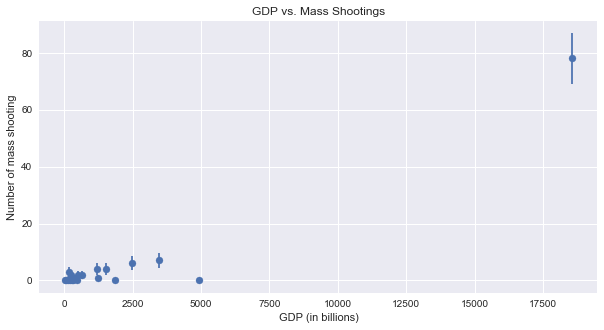

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [93]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
ax.set_title("GDP vs. Mass Shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


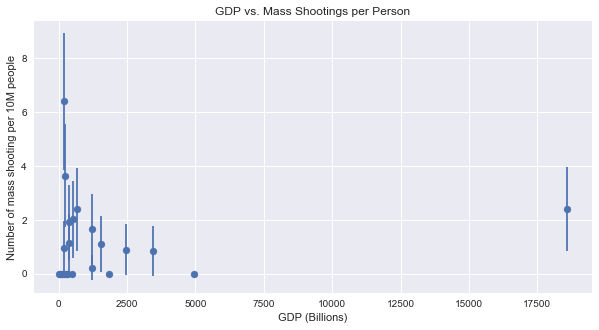

Number of mass shootings per person vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has both the highest GDP and a high number of mass shootings per person


In [94]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'] /1e9, df_['Number of mass shootings'] / df_['pop']  * 10000000)
ax.errorbar(df_['gdp'] / 1e9 , df_['Number of mass shootings'] / df_['pop']  * 10000000, 
            yerr = np.sqrt(df_['Number of mass shootings'] / df_['pop'] * 10000000), fmt = '.')
ax.set_xlabel("GDP (Billions)")
ax.set_ylabel("Number of mass shooting per 10M people")
ax.set_ylim()
ax.set_title("GDP vs. Mass Shootings per Person")
pl.show()
print ("Number of mass shootings per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has both the highest GDP and a high number of mass shootings per person")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

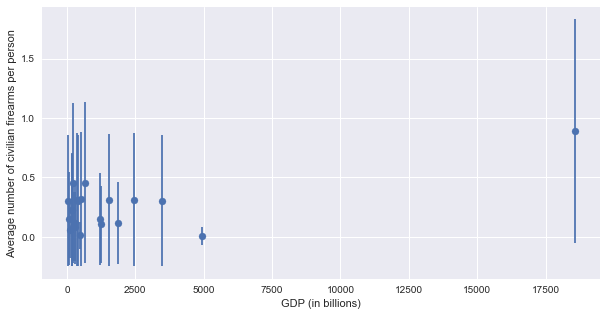

Average of Civilian Firewarms vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has both the highest GDP and the most civilian firearms per person


In [44]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Average firearms per 100 people'] / 100)
ax.errorbar(df_.gdp / 1e9, df_['Average firearms per 100 people']/100, 
            yerr = np.sqrt(df_['Average firearms per 100 people'] / 100 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average of Civilian Firewarms vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has both the highest GDP and the most civilian firearms per person")

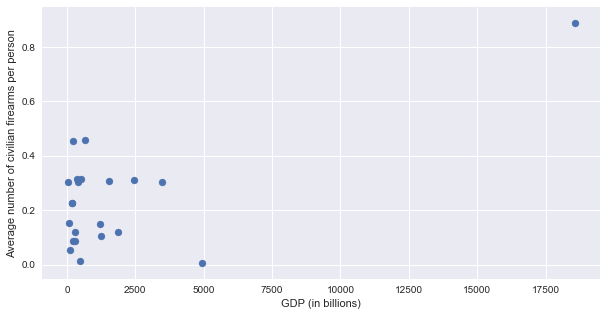

Average of Civilian Firewarms vs GDP, no error bars
The datapoint to the right of the plot is the USA, which has both the highest GDP and the most civilian firearms per person


In [45]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Average firearms per 100 people'] / 100)
ax.errorbar(df_.gdp / 1e9, df_['Average firearms per 100 people']/100, fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average of Civilian Firewarms vs GDP, no error bars" + 
       "\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has both the highest GDP and the most civilian firearms per person")


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

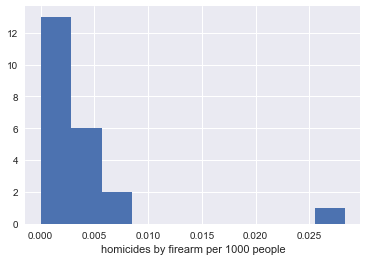

Federica's histogram of homicides by firearm


In [46]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
pl.show()
print("Federica's histogram of homicides by firearm")

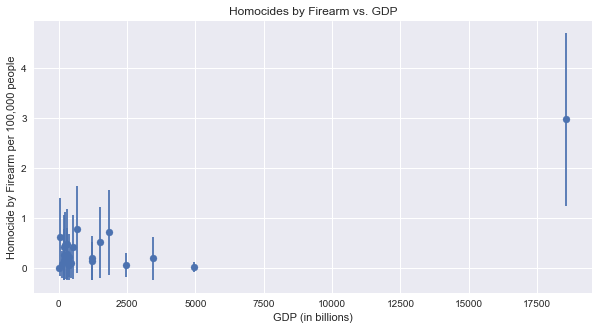

Number of homicides by firearm per 100,000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest rate of homicides by firearm per person


In [95]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Homicide by firearm rate per 100,000 pop'])
ax.errorbar(df_.gdp / 1e9, df_['Homicide by firearm rate per 100,000 pop'], 
            yerr = np.sqrt(df_['Homicide by firearm rate per 100,000 pop'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Homocide by Firearm per 100,000 people")
ax.set_title("Homocides by Firearm vs. GDP")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 100,000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest rate of homicides by firearm per person")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [74]:
# Color map
color_map = list(range(len(df_['Country'])))
color_map = ['red' for elem in color_map]
color_map[21] = 'blue'

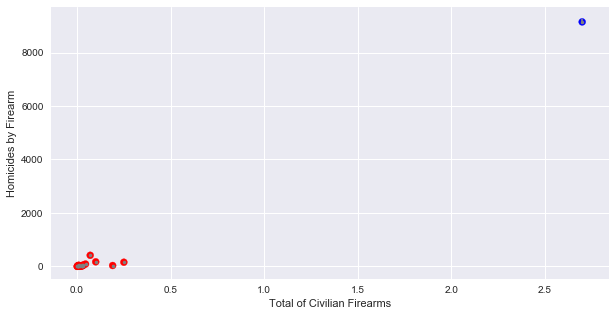

Number of homicides by firearm per 100,000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of homicides by firearm per person.
USA in blue, vs. others in red; error bars in gray


In [78]:
# With error bars
# US in yellow - rest in blue
# Error bars in green

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e8, df_['Number of homicides by firearm'], c = color_map)
ax.errorbar(df_['Average total all civilian firearms'] / 1e8, df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', c='gray')
ax.set_xlabel("Total of Civilian Firearms")
ax.set_ylabel("Homicides by Firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 100,000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of homicides by firearm per person.\n" + 
      "USA in blue, vs. others in red; error bars in gray")

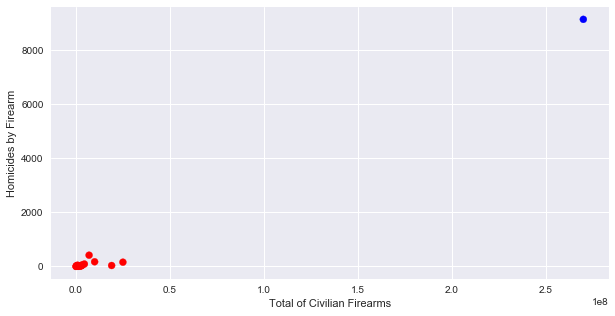

Number of homicides by firearm per 100,000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of homicides by firearm per person.
USA in blue, vs. others in red


In [80]:
# Without error bars
# US in yellow

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], c = color_map)
ax.set_xlabel("Total of Civilian Firearms")
ax.set_ylabel("Homicides by Firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 100,000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of homicides by firearm per person.\n" + 
      "USA in blue, vs. others in red")


## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


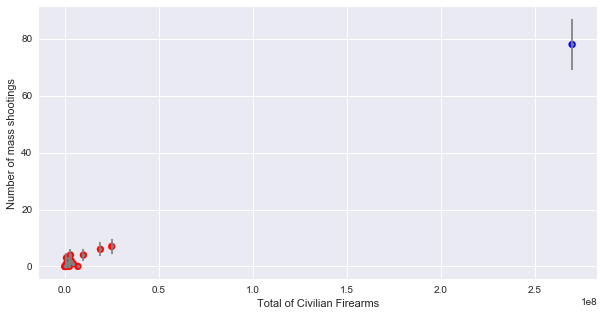

Number of homicides by firearm per 100,000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of homicides by firearm per person.
USA in blue, vs. others in red; error bars in gray


In [83]:
# With error bars 

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], c = color_map)
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', c='gray')
ax.set_xlabel("Total of Civilian Firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 100,000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of homicides by firearm per person.\n" + 
      "USA in blue, vs. others in red; error bars in gray")

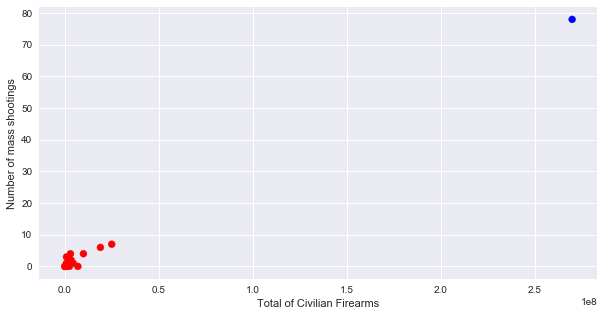

Number of homicides by firearm per 100,000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of homicides by firearm per person.
USA in blue, vs. others in red


In [84]:
# Without error bars 

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], c = color_map)
ax.set_xlabel("Total of Civilian Firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 100,000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of homicides by firearm per person.\n" + 
      "USA in blue, vs. others in red")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




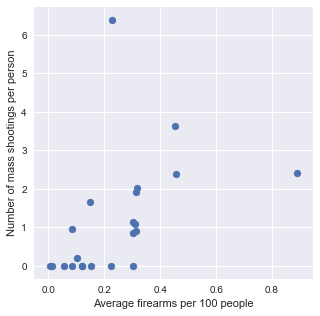

In [105]:
fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average firearms per 100 people']/100, df_['Number of mass shootings']/df_['pop'] * 10000000)
ax.set_xlabel("Average firearms per 100 people")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()

<b>Figure 1</b>: My simple plot of firearms per person against mass shootings per person, no regression.

In [106]:
lin_model = sm.OLS(endog=df_['Number of mass shootings']/df_['pop'] * 10000000,
                   exog=sm.add_constant(df_['Average firearms per 100 people']/100)).fit()

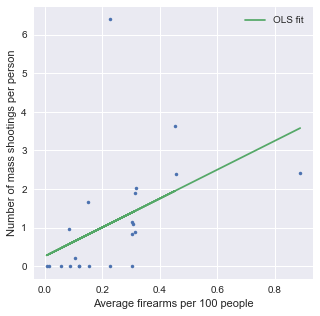

Figure showing results of OLS regression using Statsmodels.


In [108]:
# Setting up OLS

lin_model = sm.OLS(endog=df_['Number of mass shootings']/df_['pop'] * 10000000,
                   exog=sm.add_constant(df_['Average firearms per 100 people']/100)).fit()
lm = lin_model.fittedvalues

fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

pl.plot(df_['Average firearms per 100 people']/100, df_['Number of mass shootings']/df_['pop'] * 10000000, '.')
pl.plot(df_['Average firearms per 100 people']/100,lm, '-', label='OLS fit')
ax.set_xlabel("Average firearms per 100 people")
ax.set_ylabel("Number of mass shootings per person")
pl.legend()
pl.show()
print("Figure showing results of OLS regression using Statsmodels.")

In [109]:
yerror = np.abs(np.sqrt(df_['Number of mass shootings']/df_['pop'] * 10000000))

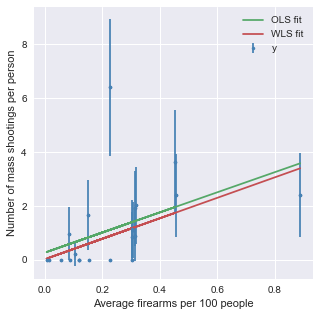

Figure showing both WLS and OLS regression using Statsmodels


In [113]:
# Setting up WLS
# Create yerror
yerror = np.abs(np.sqrt(df_['Number of mass shootings']/df_['pop'] * 10000000))

# Handle 0.0 results by mapping them to 1.0 ("neutral weight")
yerror2 = np.where(yerror==0.0, 1.0, yerror)

lin_model_2 = sm.WLS(endog=df_['Number of mass shootings']/df_['pop'] * 10000000, 
                     exog=sm.add_constant(df_['Average firearms per 100 people']/100), weights = 1/yerror2).fit()

lm2 = lin_model_2.fittedvalues

#Plot OLS and WLS
fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

pl.plot(df_['Average firearms per 100 people']/100, df_['Number of mass shootings']/df_['pop'] * 10000000, '.')
pl.errorbar(df_['Average firearms per 100 people']/100, df_['Number of mass shootings']/df_['pop'] * 10000000, 
            yerr = np.sqrt(df_['Number of mass shootings']/df_['pop'] * 10000000), fmt = '.', label = 'y', c = 'steelblue')
pl.plot(df_['Average firearms per 100 people']/100,lm, '-', label='OLS fit')
pl.plot(df_['Average firearms per 100 people']/100,lm2, '-', label='WLS fit')
ax.set_xlabel("Average firearms per 100 people")
ax.set_ylabel("Number of mass shootings per person")
pl.legend()

pl.show()
print("Figure showing both WLS and OLS regression using Statsmodels")

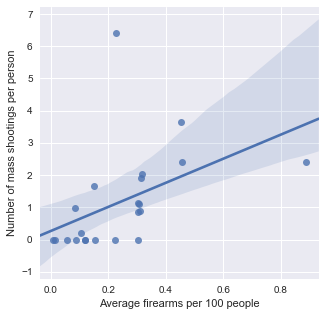

Figure shows Seaborn regression analysis of the variables


In [56]:
# Seaborn setup and plot
import seaborn as sns; sns.set(color_codes=True)

df_['MS per person'] = df_['Number of mass shootings']/df_['pop'] * 10000000
df_['FA per person'] = df_['Average firearms per 100 people']/100

fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

ax = sns.regplot(x="FA per person", y="MS per person", data=df_)
ax.set_xlabel("Average firearms per 100 people")
ax.set_ylabel("Number of mass shootings per person")

pl.show()
print("Figure shows Seaborn regression analysis of the variables")

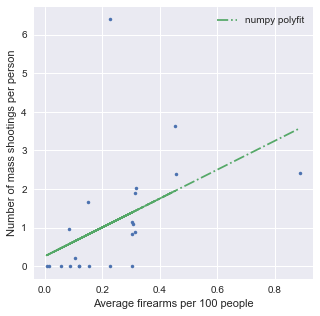

Figure with numpy.polyfit regression line


In [58]:
# Setting up numpy.polyfit based on example from https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
m, b = np.polyfit(df_['Average firearms per 100 people']/100, df_['Number of mass shootings']/df_['pop'] * 10000000, 1) 

fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

pl.plot(df_['Average firearms per 100 people']/100, df_['Number of mass shootings']/df_['pop'] * 10000000, '.')
pl.plot(df_['Average firearms per 100 people']/100, df_['Average firearms per 100 people']/100 * m + b, '-.', 
        label='numpy polyfit')
ax.set_xlabel("Average firearms per 100 people")
ax.set_ylabel("Number of mass shootings per person")
pl.legend()

pl.show()
print("Figure with numpy.polyfit regression line")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

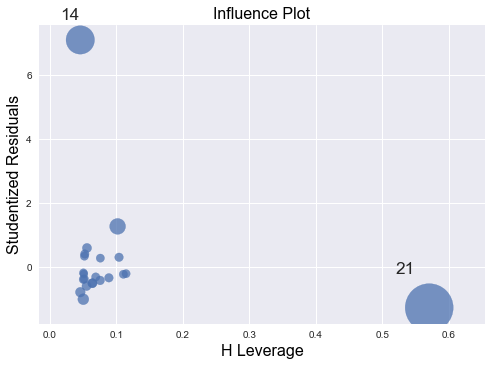

In [59]:
sm.graphics.influence_plot(lin_model, alpha  = 0.05, criterion="cooks");

## Discuss your findings

The values that stand out from the influence plot are indexes 14 and 21 (New Zealand and the United States, respectively). The x-axis represents the residuals for the value, and the y-axis represents the H-leverage, a measure of the influence of the value on the model. Finally, the bubble size represents Cook's distance, another measure of a value's influence on the analysis. This influence plot attests further to the significance of the United States, both on the values of the OLS regression model and as a strong influence in the data set. New Zealand also stands out strongly as a nation with a small population and outsize (albeit small) number of shootings.